In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
# import json
# 
# # Read the file as a string
# with open('results2.json', 'r') as f:
#     data_str = f.read()
# 
# # Replace single quotes with double quotes
# data_str = data_str.replace("'", '"')
# 
# # Load the string as a JSON object
# data = json.loads(data_str)
# 
# # Now you can proceed with your data processing
# for i in range(len(data)):
#     # Convert each key to a string
#     data[i] = {str(key): value for key, value in data[i].items()}
# 
# # Write the modified data back to the JSON file
# with open('results2_edit.json', 'w') as f:
#     json.dump(data, f)

In [60]:
df2 = pd.read_json('results2_edit.json')
df1 = pd.read_json('results_3.json')
df1.head()

,patch_name,patch_class,patch_size,acc_undef,acc_def
0,class_0_patch_0_size_45_3_ep_3.pt,0,453,0.845,0.364
1,class_0_patch_0_size_90_1_ep_3.pt,0,901,0.737,0.246
2,class_0_patch_0_size_90_3_ep_3.pt,0,903,1.000,0.278
3,class_0_patch_1_size_45_3_ep_3.pt,0,453,0.857,0.353
4,class_0_patch_1_size_90_1_ep_3.pt,0,901,0.740,0.304


In [61]:
labels = ['Downstairs','Jogging','Sitting','Standing','Upstairs','Walking']

In [62]:
# off the whole dataset, get the average difference between acc_undef and acc_def
df1['acc_diff'] = df1['acc_def'] - df1['acc_undef']
mean_diff = df1['acc_diff'].mean()
print(f'The average difference between acc_undef and acc_def is {mean_diff}')

The average difference between acc_undef and acc_def is -0.39937777777777783


C:\Users\gijsd\AppData\Local\Temp\ipykernel_16828\1795556413.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_grouped = df_filtered.groupby('patch_class')['acc_undef', 'acc_def'].mean().reset_index()


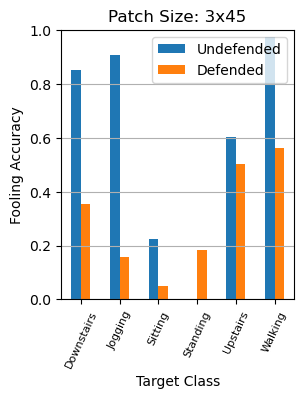

C:\Users\gijsd\AppData\Local\Temp\ipykernel_16828\1795556413.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_grouped = df_filtered.groupby('patch_class')['acc_undef', 'acc_def'].mean().reset_index()


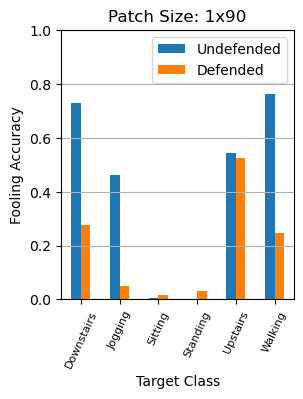

C:\Users\gijsd\AppData\Local\Temp\ipykernel_16828\1795556413.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_grouped = df_filtered.groupby('patch_class')['acc_undef', 'acc_def'].mean().reset_index()


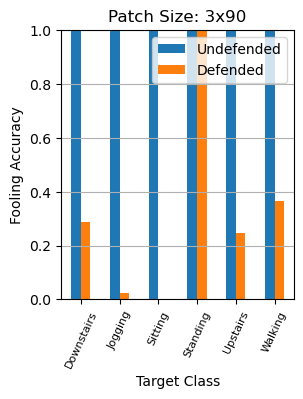

In [63]:
# Get unique 'patch_size' values
patch_sizes = df1['patch_size'].unique()
# For each unique 'patch_size'
for patch_size in patch_sizes:
    #initialize a new figure, with size 8x8
    fig, ax = plt.subplots(figsize=(3,3.5))

    # Filter the DataFrame
    df_filtered = df1[df1['patch_size'] == patch_size]
    # Group by 'patch_class', and calculate the mean of 'acc_undef' and 'acc_def'
    df_grouped = df_filtered.groupby('patch_class')['acc_undef', 'acc_def'].mean().reset_index()

    patch_rows = str(patch_size)[-1]
    patch_cols = str(patch_size)[:-1]
    patch_size = f'{patch_rows}x{patch_cols}'

    #rename acc_undef and acc_def to Undefended and Defended
    df_grouped = df_grouped.rename(columns={'acc_undef': 'Undefended', 'acc_def': 'Defended'})
    df_grouped.plot(x='patch_class', y=['Undefended', 'Defended'], kind='bar', title=f'Patch Size: {patch_size}', ax=ax)
    plt.xlabel('Target Class')
    plt.ylabel('Fooling Accuracy')
    plt.ylim(0, 1)
    plt.grid(axis='y')
    ax.set_xticklabels(labels, rotation=65, fontsize=8)
    #save the figure
    plt.savefig(f'images/patch_size_{patch_size}.png', dpi=300, bbox_inches='tight')
    plt.show()